# 1.3.1 Basic Operations on Images

In [1]:
# Accessing and Modifying pixel values

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
# cv2.imread() 함수로 cat.jpg를 img에 저장
img = cv2.imread('cat.jpg')

In [4]:
# 불러온 이미지를 matplotlib으로 바로 불러오는 함수
def pltImage(img):
    plt.imshow(img)
    
    # X, Y 축의 눈금 값 숨기기
    plt.xticks([]), plt.yticks([])
    plt.show()

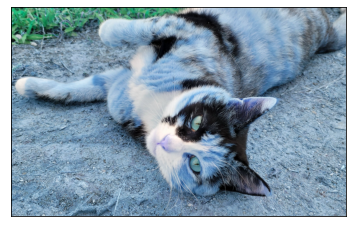

In [5]:
pltImage(img)

In [6]:
# 여러 프로그램들은 RGB 값으로 읽는 반면에 OpenCV는 BGR로 되어있음에 유의
# 이미지의 100x100에 해당하는 픽셀의 BGR 값을 읽음
px = img[100, 100]
print(px)

[30 73 58]


In [7]:
# 파란색 픽셀만 접근
blue = img[100, 100, 0]
print(blue)

30


In [8]:
# 픽셀 값을 수정 가능함
img[100, 100] = [255, 255, 255]
print(img[100, 100])

[255 255 255]


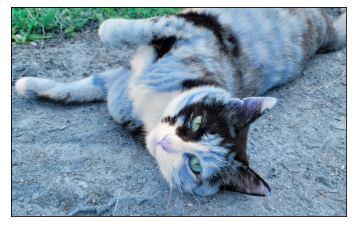

In [9]:
pltImage(img)

In [10]:
# RED 값에 더 빨리 엑세스 하는 방법
# Numpy array 방법으로, array.item() 이나 array.itemset()으로 엑세스 하는 방법이다.
# 항상 스칼라(scalar)값을 출력한다.
# BGR 값을 모두 접근 하는 것이 아니라서 array.item()으로 BGR값에 대해 각각 불러야한다.
# 10x10에 해당하는 픽셀에 접근
img.item(10, 10, 2)

117

In [11]:
# RED 값 수정
# itemset((픽셀의 x좌표, 픽셀의 y좌표, BGR(0, 1, 2)), 변경하고자하는 값)
img.itemset((10, 10, 2), 100)
img.item(10, 10, 2)

100

In [12]:
# Accessing Image Properties

In [13]:
# 이미지의 속성 확인

# img.shape로 세로, 가로, 컬러 채널 확인 가능
print(img.shape)

# img.size로 총 픽셀의 갯수 확인 가능
print(img.size)

# img.dtypedmfh 데이터 타입 확인 가능
# unsign 8비트 타입이라 0부터 255까지 // BGR
print(img.dtype)

(900, 1440, 3)
3888000
uint8


In [14]:
# Image ROI

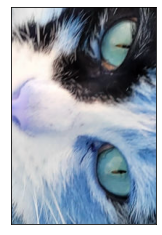

In [15]:
# Region of Interrest(관심지역)
# 눈과 같은 부분은 얼굴에 높은 확률로 있기 때문에 얼굴을 크롭하여 인식하게 되면 성능이 개선되는 효과가 있다. 

# img[y1 : y1 + h, x1 : x1 + w]
# img[시작 높이 좌표 : 끝 높이 좌표, 시작 폭 좌표 : 끝 폭 좌표]
# roi = img[450 : 750, 650 : 850]

# 다른 방법
y1 = 450
x1 = 650
h = 300
w = 200

roi = img[y1 : y1 + h, x1 : x1 + w]

pltImage(roi)

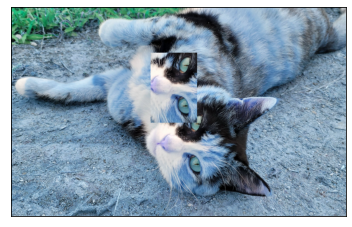

In [16]:
# img[y2 : y2 + h, x2 : x2 + w]
# img[시작 높이 좌표 : 끝 높이 좌표, 시작 폭 좌표 : 끝 폭 좌표]
# img[200 : 500, 600 : 800] = roi

y2 = 200
x2 = 600

img[y2 : y2 + h, x2 : x2 + w] = roi

pltImage(img)

In [17]:
# Splitting and Merging Image Channels

In [18]:
img = cv2.imread('cat.jpg')

(900, 1440)


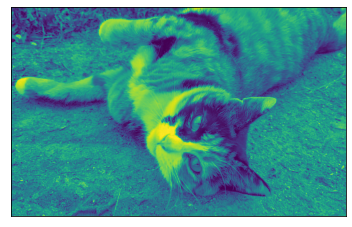

In [19]:
# cv2.split() --> 채널 분리 함수
b, g, r = cv2.split(img)
print(b.shape)

pltImage(b)

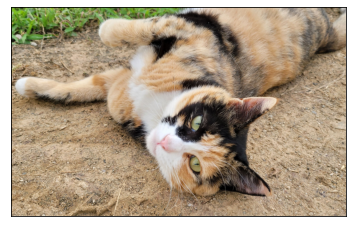

In [20]:
# cv2.merge() --> 채널 병합 함수
# OpenCV에서는 BGR이 기본이어서 앞에서는 정상적으로 보이지 않았으나 cv2.merge()로 RGB로 채널 병합을 하면서 이미지가 정상으로 보여짐.
img = cv2.merge((r, g, b))

pltImage(img)

In [21]:
# Making Borders for Images (Padding)

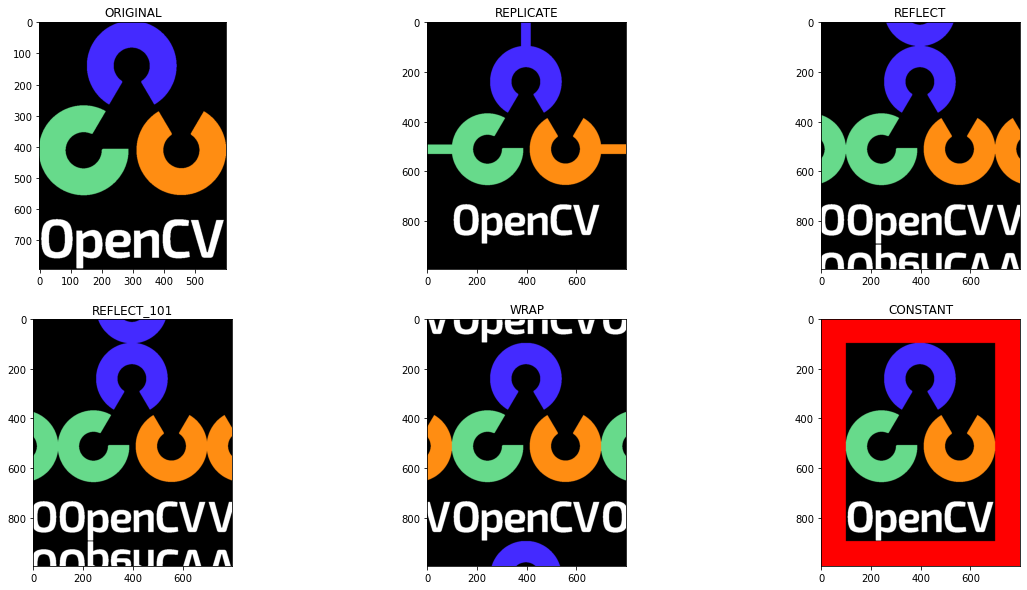

In [22]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# BGR에서 BLUE는 255, 0, 0이다.
BLUE = [255, 0, 0]

img1 = cv2.imread('logo.png')

# 테두리의 길이
m = 100

# cv2.copyMakeBorder() --> 이미지 테두리 만들기
# cv2.copyMakeBorder(이미지 변수, 위, 아래, 왼쪽, 오른쪽, 테두리 타입)

# cv2.BORDER_REPLICATE --> aaaaaa | abcdefgh | hhhhhhh
replicate = cv2.copyMakeBorder(img1, m, m, m, m, cv2.BORDER_REPLICATE)
# cv2.BORDER_REFLECT --> fedcba | abcdefgh | hgfedcb
reflect = cv2.copyMakeBorder(img1, m, m, m, m, cv2.BORDER_REFLECT) 
# cv2.BORDER_REFLECT_101 --> gfedcb | abcdefgh | gfedcba
reflect101 = cv2.copyMakeBorder(img1, m, m, m, m, cv2.BORDER_REFLECT_101)
# cv2.BORDER_WRAP --> (바둑판식 배열) cdefgh | abcdefgh | abcdefg
wrap = cv2.copyMakeBorder(img1, m, m, m, m, cv2.BORDER_WRAP)
# cv2.BORDER_CONSTANT --> (인수로 지정한 색상으로) iiiiii | abcdefgh | iiiiiii
constant= cv2.copyMakeBorder(img1, m, m, m, m, cv2.BORDER_CONSTANT,value=BLUE)

# replicate = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REPLICATE)
# reflect = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT)
# reflect101 = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_REFLECT_101)
# wrap = cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_WRAP)
# constant= cv2.copyMakeBorder(img1,10,10,10,10,cv2.BORDER_CONSTANT,value=BLUE)

# matplotlib로 볼 때 이미지의 사이즈를 변경하는 것
plt.rcParams["figure.figsize"] = (20,10)

# plt.subplot(231) --> 2x3 행렬로 정렬된 표에서 1번째(왼쪽 위부터)
plt.subplot(231),plt.imshow(img1,'gray'),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(replicate,'gray'),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(reflect,'gray'),plt.title('REFLECT')
plt.subplot(234),plt.imshow(reflect101,'gray'),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(wrap,'gray'),plt.title('WRAP')
plt.subplot(236),plt.imshow(constant,'gray'),plt.title('CONSTANT')

plt.show()